<a href="https://colab.research.google.com/github/kibumbing/AI-DT/blob/main/head_std.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv('raw_total_data.csv', encoding="utf-8-sig")
df.head()

,TAG_MIN,배정번호,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입1존 OP,소입2존 OP,소입3존 OP,소입4존 OP,소입로 CP 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,솔트조 온도 2 Zone
0,2022-01-03 11:22:07,102410,75.6648,30.0155,NaN,NaN,68.4386,72.84030,59.7862,51.71690,71.8405,0.450421,NaN,859.854,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-03 11:22:08,102410,75.6706,32.2732,NaN,NaN,68.4386,78.44150,61.6286,50.44530,70.5198,0.450356,860.338,859.780,860.044,859.786,294.658,272.538,328.734,328.865
2,2022-01-03 11:22:09,102410,75.6776,32.1592,98.8533,99.14600,68.4386,78.10990,61.5414,52.01960,72.0384,0.450341,860.338,859.780,859.981,859.724,294.658,272.538,328.734,328.805
3,2022-01-03 11:22:11,102410,75.8656,30.8312,98.7918,99.17675,68.4999,77.50725,60.6663,52.69425,73.4815,0.450201,860.338,859.842,859.950,859.599,294.719,272.538,328.674,328.865
4,2022-01-03 11:22:12,102410,73.6468,29.5274,98.7918,99.20750,68.4386,76.02620,61.1634,51.69150,71.6093,0.450235,860.351,859.791,859.991,859.731,294.721,272.599,328.740,328.808


In [3]:
df_label = pd.read_excel('./label.xlsx')

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
df.isna().sum()
df.dropna(axis = 0, inplace = True)

In [15]:
df_std = df.drop(columns = 'TAG_MIN').groupby('배정번호').std().reset_index()
df_std.columns = [i + '_std' for i in df.columns[1:]]
df_std.rename(columns = {'배정번호_std' : '배정번호'},inplace=True)
df_std.head()

,배정번호,건조 1존 OP_std,건조 2존 OP_std,건조로 온도 1 Zone_std,건조로 온도 2 Zone_std,세정기_std,소입1존 OP_std,소입2존 OP_std,소입3존 OP_std,소입4존 OP_std,소입로 CP 값_std,소입로 온도 1 Zone_std,소입로 온도 2 Zone_std,소입로 온도 3 Zone_std,소입로 온도 4 Zone_std,솔트 컨베이어 온도 1 Zone_std,솔트 컨베이어 온도 2 Zone_std,솔트조 온도 1 Zone_std,솔트조 온도 2 Zone_std
0,102410,3.696611,4.346476,0.593971,0.483518,0.845302,22.982780,1.783914,1.440141,2.504476,0.005897,3.574274,0.400697,0.281661,0.553494,9.371323,6.034029,0.122711,0.116509
1,102585,3.371378,2.786972,0.516453,0.353820,1.066804,23.564242,1.927225,1.484217,2.253172,0.002788,3.009970,0.402013,0.235296,0.483648,9.442414,7.154698,0.101246,0.089362
2,102930,3.231467,2.581707,0.472710,0.343075,1.097989,23.673453,2.101317,1.420186,2.131135,0.005881,2.827155,0.384465,0.241958,0.418493,9.679513,6.664811,0.120122,0.115584
3,103142,2.635206,2.402697,0.331403,0.251791,1.064265,15.461491,1.580444,1.243398,1.786167,0.003957,1.541679,0.246588,0.188586,0.296754,9.495650,6.537643,0.097665,0.100490
4,103675,4.159883,3.622600,0.655434,0.470808,0.991572,23.556532,1.509201,1.767218,2.700699,0.002963,3.684205,0.295628,0.319066,0.571261,9.705127,5.366741,0.089953,0.078856


In [16]:
df_label = df_label[['배정번호', '양품수량', '불량수량']]

In [18]:
df_total = pd.merge(left = df_label , right = df_std, how = "inner", on = "배정번호")
df_total.head()

,배정번호,양품수량,불량수량,건조 1존 OP_std,건조 2존 OP_std,건조로 온도 1 Zone_std,건조로 온도 2 Zone_std,세정기_std,소입1존 OP_std,소입2존 OP_std,...,소입4존 OP_std,소입로 CP 값_std,소입로 온도 1 Zone_std,소입로 온도 2 Zone_std,소입로 온도 3 Zone_std,소입로 온도 4 Zone_std,솔트 컨베이어 온도 1 Zone_std,솔트 컨베이어 온도 2 Zone_std,솔트조 온도 1 Zone_std,솔트조 온도 2 Zone_std
0,102410,15160,3,3.696611,4.346476,0.593971,0.483518,0.845302,22.982780,1.783914,...,2.504476,0.005897,3.574274,0.400697,0.281661,0.553494,9.371323,6.034029,0.122711,0.116509
1,102585,29892,10,3.371378,2.786972,0.516453,0.353820,1.066804,23.564242,1.927225,...,2.253172,0.002788,3.009970,0.402013,0.235296,0.483648,9.442414,7.154698,0.101246,0.089362
2,102930,59616,30,3.231467,2.581707,0.472710,0.343075,1.097989,23.673453,2.101317,...,2.131135,0.005881,2.827155,0.384465,0.241958,0.418493,9.679513,6.664811,0.120122,0.115584
3,103142,74730,13,2.635206,2.402697,0.331403,0.251791,1.064265,15.461491,1.580444,...,1.786167,0.003957,1.541679,0.246588,0.188586,0.296754,9.495650,6.537643,0.097665,0.100490
4,103675,14979,2,4.159883,3.622600,0.655434,0.470808,0.991572,23.556532,1.509201,...,2.700699,0.002963,3.684205,0.295628,0.319066,0.571261,9.705127,5.366741,0.089953,0.078856


In [19]:
df_total.describe()

,배정번호,양품수량,불량수량,건조 1존 OP_std,건조 2존 OP_std,건조로 온도 1 Zone_std,건조로 온도 2 Zone_std,세정기_std,소입1존 OP_std,소입2존 OP_std,...,소입4존 OP_std,소입로 CP 값_std,소입로 온도 1 Zone_std,소입로 온도 2 Zone_std,소입로 온도 3 Zone_std,소입로 온도 4 Zone_std,솔트 컨베이어 온도 1 Zone_std,솔트 컨베이어 온도 2 Zone_std,솔트조 온도 1 Zone_std,솔트조 온도 2 Zone_std
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,116047.480769,49273.326923,12.211538,3.231163,3.086578,0.452828,0.360068,0.514210,22.879342,2.594453,...,2.035850,0.010448,3.022052,0.500875,0.326708,0.399307,9.370171,6.326327,0.113775,0.126455
std,7700.002948,29269.626505,12.700682,0.700397,0.817121,0.128337,0.131932,0.287924,4.825574,1.139101,...,1.671135,0.025028,1.159747,0.183421,0.167474,0.432106,1.129121,0.900228,0.035823,0.076336
min,102410.000000,9020.000000,0.000000,1.422701,1.320750,0.079056,0.046461,0.056181,2.566098,0.995235,...,0.922417,0.001326,0.110878,0.155739,0.119106,0.068222,1.471643,0.490796,0.049244,0.036372
25%,108227.750000,26478.000000,3.000000,2.738000,2.497050,0.371910,0.265264,0.322706,20.414063,1.922620,...,1.647528,0.002763,2.258990,0.368894,0.242383,0.298539,9.425075,6.191860,0.095335,0.080616
50%,118334.500000,45125.500000,7.500000,3.228899,3.010662,0.430293,0.340279,0.398209,23.405088,2.391807,...,1.774092,0.003329,2.821740,0.472997,0.312073,0.328168,9.557586,6.461443,0.104714,0.106207
75%,122393.250000,74971.250000,16.000000,3.621018,3.526345,0.523336,0.417804,0.598699,25.353130,3.026378,...,2.057843,0.004574,3.704035,0.618754,0.368464,0.385794,9.619951,6.654351,0.121534,0.132581
max,125637.000000,104740.000000,58.000000,5.053263,5.743037,0.756998,0.766067,1.442992,31.841143,9.029896,...,13.635623,0.143812,7.209694,0.917073,1.315604,3.388479,9.811212,7.154698,0.291220,0.376869


In [20]:
df_total.dtypes

,0
배정번호,int64
양품수량,int64
불량수량,int64
건조 1존 OP_std,float64
건조 2존 OP_std,float64
건조로 온도 1 Zone_std,float64
건조로 온도 2 Zone_std,float64
세정기_std,float64
소입1존 OP_std,float64
소입2존 OP_std,float64


Text(0, 0.5, 'temperature')

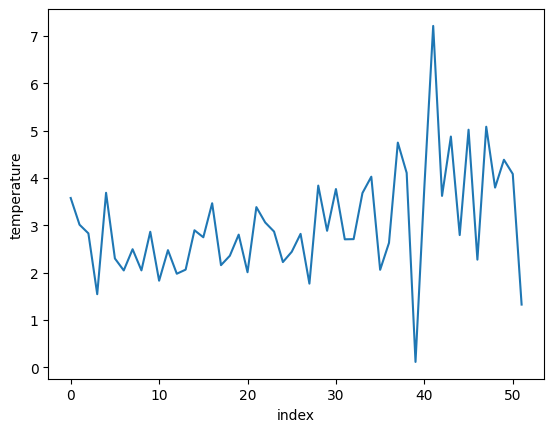

In [22]:
import matplotlib.pyplot as plt
plt.plot(df_total[['소입로 온도 1 Zone_std']])
plt.xlabel('index')
plt.ylabel('temperature')

<Axes: >

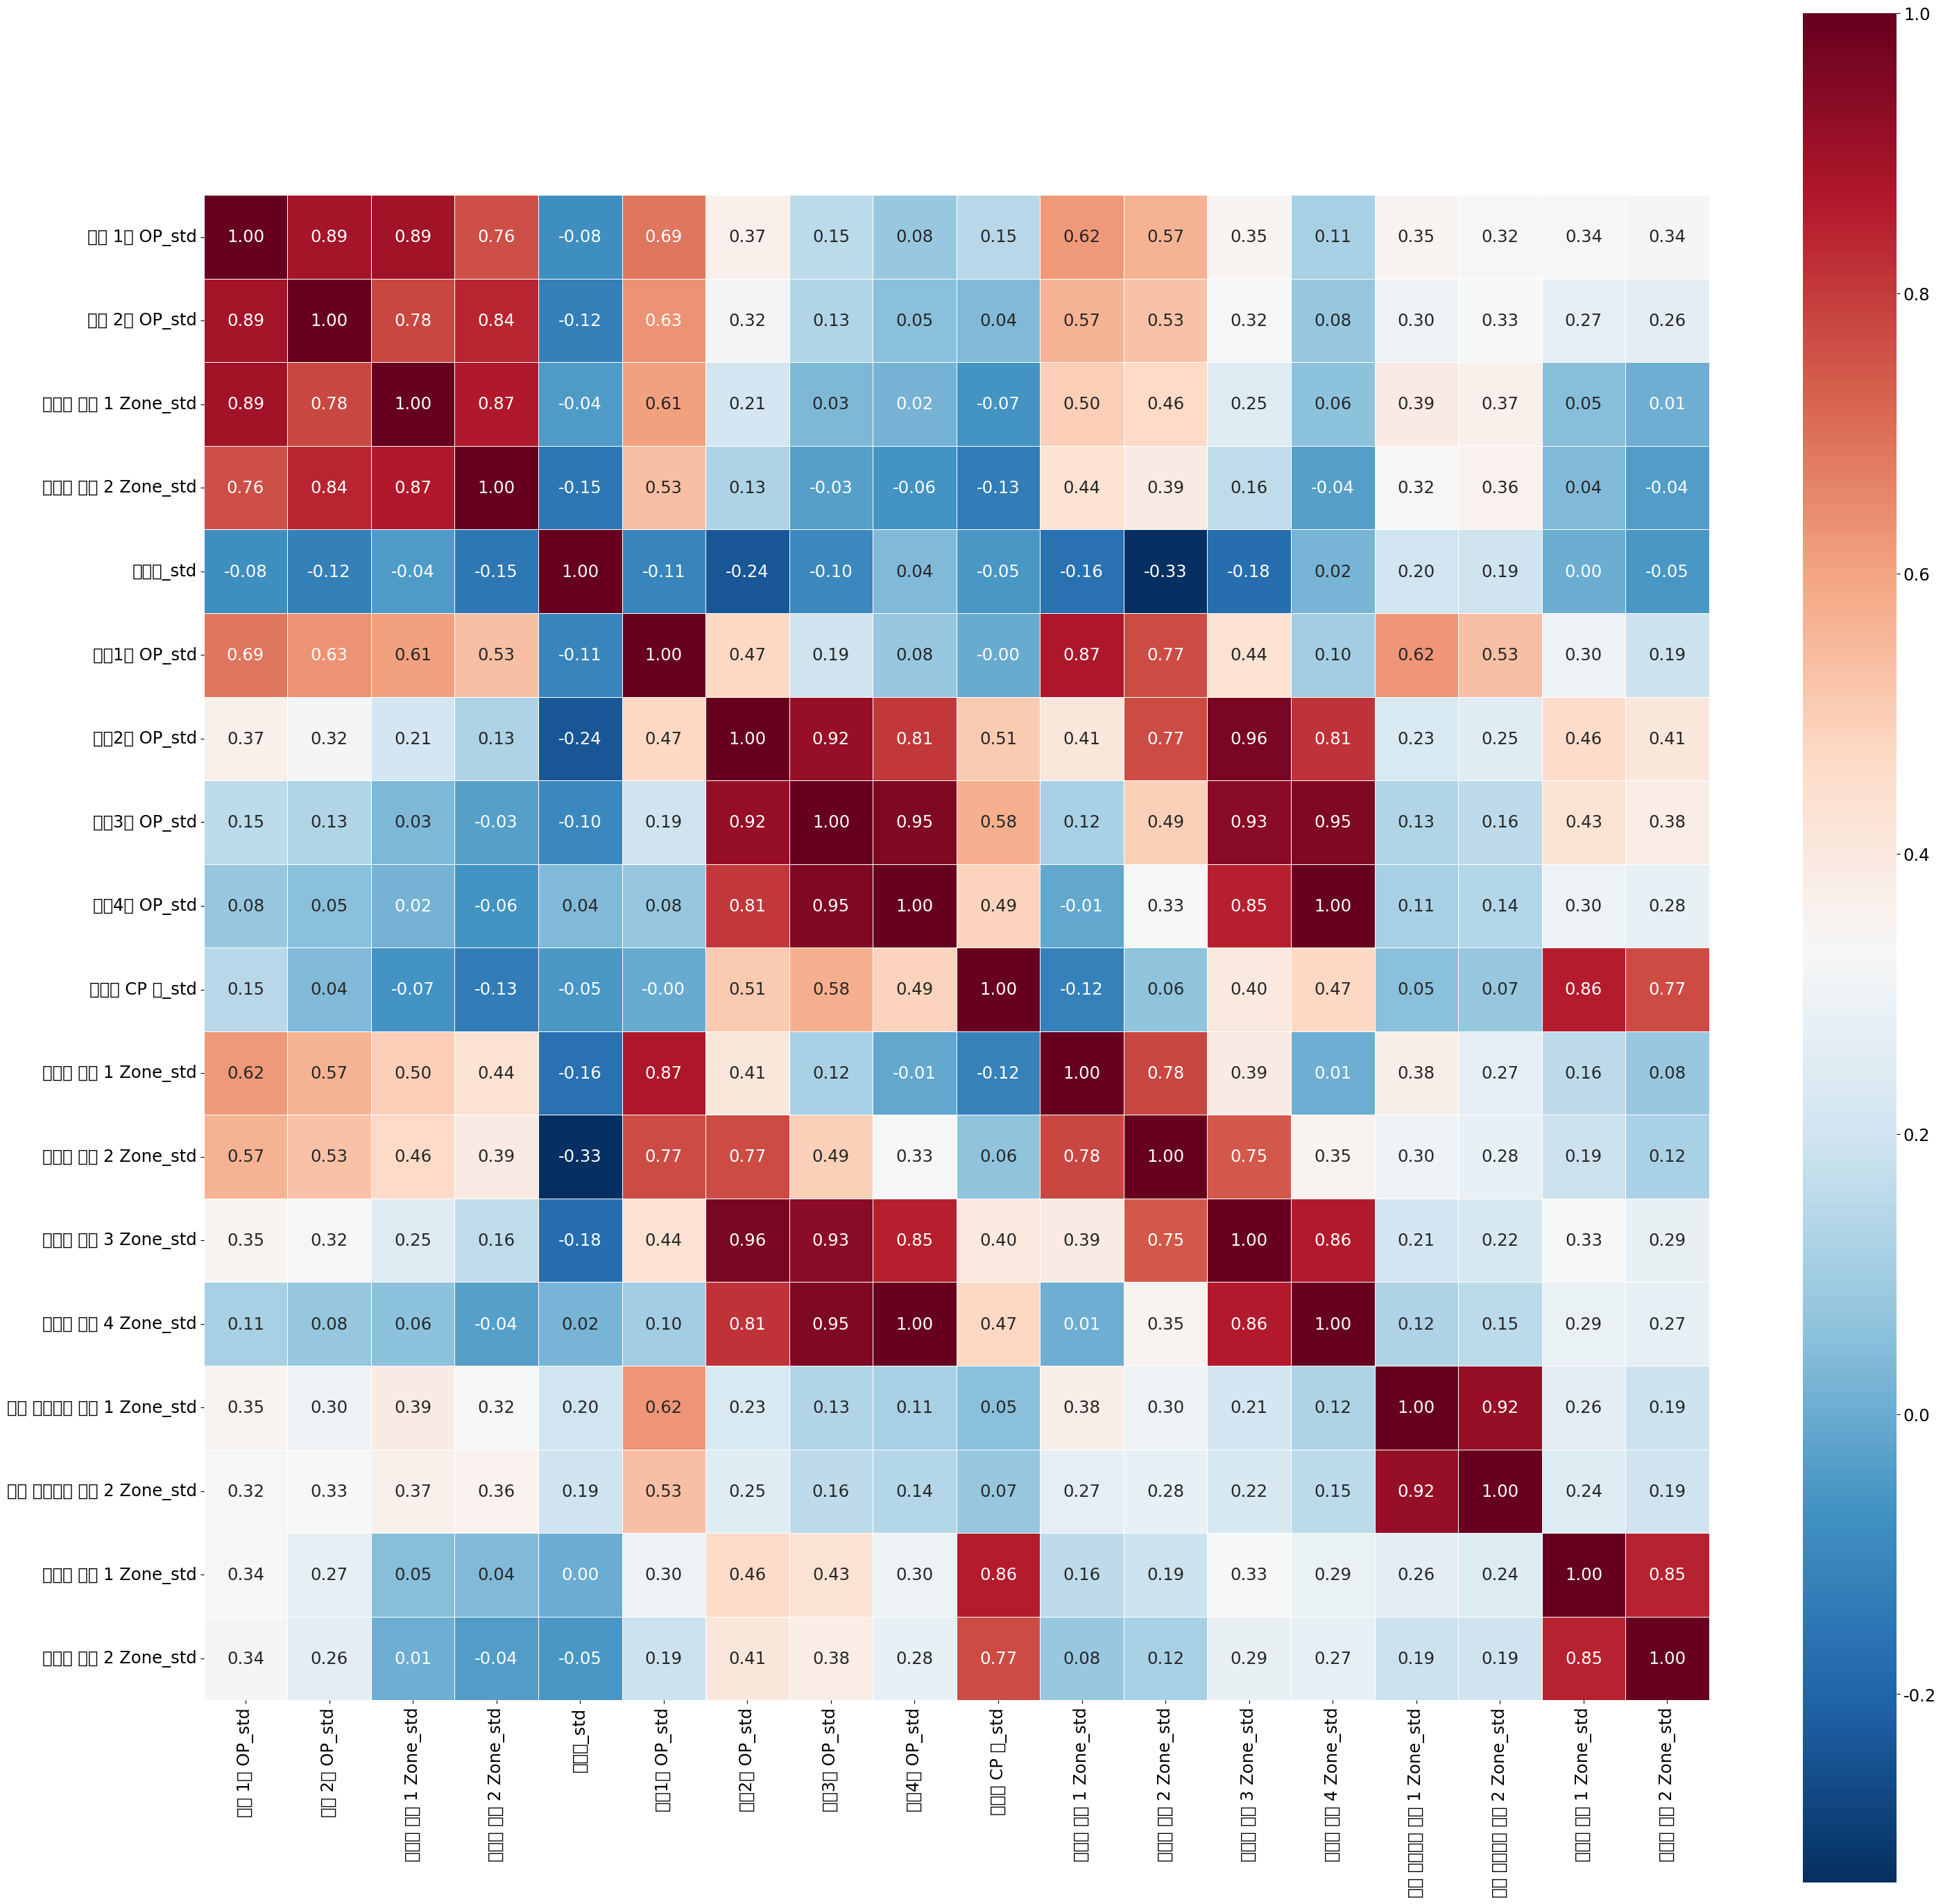

In [32]:
import matplotlib
import seaborn as sns
plt.figure(figsize=(35, 35))
sns.heatmap(data = df_total.drop(columns = ['배정번호', '양품수량', '불량수량']).corr(), annot=True, fmt = '.2f',
square=True, linewidths=.5, cmap="RdBu_r")

In [33]:
# 건조 1존 OP_std
# 건조 2존 OP_std
# 건조로 온도 1 Zone_std

# 건조로 온도 2 Zone_std

# 세정기_std

# 소입1존 OP_std
# 소입로 온도 1 Zone_std

# 소입2존 OP_std
# 소입로 온도 2 Zone_std

# 소입3존 OP_std
# 소입로 온도 3 Zone_std

# 소입4존 OP_std
# 소입로 온도 4 Zone_std

# 소입로 CP 값_std

# 솔트 컨베이어 온도 1 Zone_std
# 솔트 컨베이어 온도 2 Zone_std

# 솔트조 온도 1 Zone_std
# 솔트조 온도 2 Zone_std


lst = ['건조 2존 OP_std', '건조로 온도 1 Zone_std', '소입로 온도 1 Zone_std',
 '소입로 온도 2 Zone_std', '소입로 온도 3 Zone_std',
 '소입로 온도 4 Zone_std', '솔트 컨베이어 온도 2 Zone_std',
 '솔트조 온도 2 Zone_std']
df_total.drop(columns = lst, inplace = True)

In [34]:
df_total['불량비율'] = df_total['불량수량'] / (df_total['불량수량'] + df_total['양품수량']) * 100

In [36]:
X_train = df_total.drop(columns = ['배정번호', '양품수량', '불량수량', '불량비율'])
Y_train = df_total['불량비율']

In [37]:
from sklearn.preprocessing import MinMaxScaler
# 스케일링
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [38]:
from sklearn.model_selection import train_test_split
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.05, random_state = 1132)

In [39]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(random_state = 1132)
DT.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1132)

In [40]:
from sklearn.metrics import r2_score
print("Train R2 Score : {}".format(r2_score(y_train, LR.predict(x_train))))
print("Test R2 Score : {}".format(r2_score(y_test, LR.predict(x_test))))

Train R2 Score : 0.33044790631182674
Test R2 Score : -0.24753898769111782


In [41]:
from sklearn.metrics import r2_score
print("Train R2 Score : {}".format(r2_score(y_train, DT.predict(x_train))))
print("Test R2 Score : {}".format(r2_score(y_test, DT.predict(x_test))))

Train R2 Score : 1.0
Test R2 Score : 0.502957455679252


In [42]:
from sklearn.metrics import mean_squared_error
print("Train RMSE Score : {}".format(mean_squared_error(y_train, LR.predict(x_train)) ** 2))
print("Test RMSE Score : {}".format(mean_squared_error(y_test, LR.predict(x_test)) ** 2))

Train RMSE Score : 8.246507555932598e-07
Test RMSE Score : 7.482309116450098e-08


In [43]:
from sklearn.metrics import mean_absolute_error
print("Train MAE Score : {}".format(mean_absolute_error(y_train, LR.predict(x_train)) ** 2))
print("Test MAE Score : {}".format(mean_absolute_error(y_test, LR.predict(x_test)) ** 2))

Train MAE Score : 0.00035020240100835557
Test MAE Score : 0.00021228374717178046


In [44]:
from sklearn.metrics import mean_squared_error
print("Train RMSE Score : {}".format(mean_squared_error(y_train, DT.predict(x_train)) ** 2))
print("Test RMSE Score : {}".format(mean_squared_error(y_test, DT.predict(x_test)) ** 2))

Train RMSE Score : 0.0
Test RMSE Score : 1.1877212312077108e-08


In [45]:
from sklearn.metrics import mean_absolute_error
print("Train MAE Score : {}".format(mean_absolute_error(y_train, DT.predict(x_train)) ** 2))
print("Test MAE Score : {}".format(mean_absolute_error(y_test, DT.predict(x_test)) ** 2))

Train MAE Score : 0.0
Test MAE Score : 9.688060220287916e-05


In [50]:
lst = [[df_total.columns[3:-1][i], LR.coef_[i]] for i in range(len(LR.coef_))]
lst

[['건조 1존 OP_std', np.float64(0.0430502768022327)],
 ['건조로 온도 2 Zone_std', np.float64(-0.00789816683217515)],
 ['세정기_std', np.float64(-0.07300054918968342)],
 ['소입1존 OP_std', np.float64(0.05487520484584973)],
 ['소입2존 OP_std', np.float64(0.033036530244779184)],
 ['소입3존 OP_std', np.float64(-0.6685269514975634)],
 ['소입4존 OP_std', np.float64(0.5820544442432852)],
 ['소입로 CP 값_std', np.float64(0.007402656632076089)],
 ['솔트 컨베이어 온도 1 Zone_std', np.float64(-0.005370178831279426)],
 ['솔트조 온도 1 Zone_std', np.float64(0.03747604849766042)]]